# Tweets Sentiment Analysis 

In [3]:
## Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot

In [4]:
df = pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.shape

(162980, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [14]:
df.rename(columns={'clean_text':'Tweet', 'category':'sentiment'}, inplace=True)

In [16]:
df.columns

Index(['Tweet', 'sentiment'], dtype='object')

In [17]:
df['sentiment'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: sentiment, dtype: int64

In [103]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [104]:
df['label'] = df['sentiment'].apply(sentiment)

In [106]:
df.head()

,Tweet,sentiment,label
0,modi promis minimum govern maximum govern expe...,-1.0,Negative
1,talk nonsens continu drama vote modi,0.0,Neutral
2,say vote modi welcom bjp told rahul main campa...,1.0,Positive
3,ask support prefix chowkidar name modi great s...,1.0,Positive
4,answer among power world leader today trump pu...,1.0,Positive


<Axes: xlabel='label', ylabel='count'>

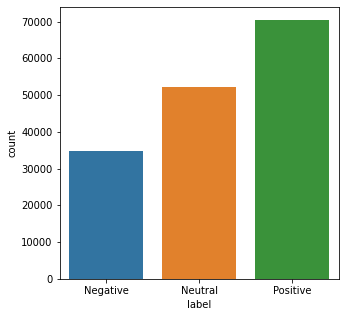

In [107]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data =df) 

Text(0.5, 1.0, 'Distribution of sentiments')

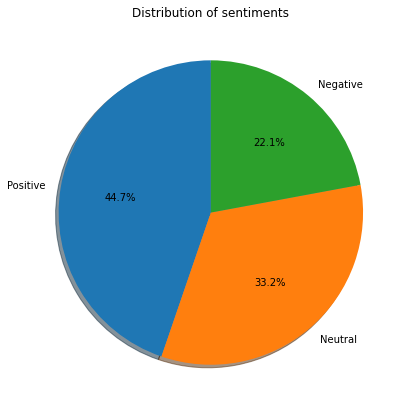

In [111]:
fig = plt.figure(figsize=(7,7))
#wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['label'].value_counts()
#explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, 
         startangle=90,  label='')
plt.title('Distribution of sentiments')

In [19]:
for i in range (7):
    print('Tweet: ',[i])
    print('\n')
    print(df['Tweet'].loc[i], '\n')
    print('sentiment: ',df['sentiment'].iloc[i],'\n\n')

Tweet:  [0]


when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples 

sentiment:  -1.0 


Tweet:  [1]


talk all the nonsense and continue all the drama will vote for modi  

sentiment:  0.0 


Tweet:  [2]


what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax 

sentiment:  1.0 


Tweet:  [3]


asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars 

sentiment:  1.0 


Tweet:  [4]


answer who among these the most powerful world leader today trump putin modi may  

sentiment:  1.0 


Tweet:  [5]


kiya tho refresh maarkefir comment karo  

sentiment:  0.0 


Tweet:  [6]


surat women perform yagna seeks divine gr

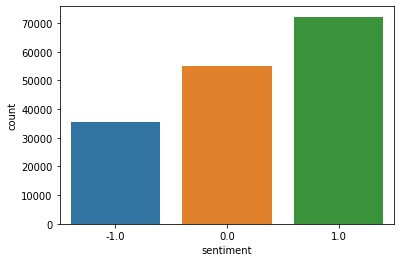

In [22]:
sns.countplot(data=df, x="sentiment")
plt.show()

### Data Preprocessing

In [32]:
df.head()

,Tweet,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [33]:
df.isna().sum()

Tweet        4
sentiment    7
dtype: int64

In [38]:
df.dropna(inplace=True)


In [42]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

df.head()

,Tweet,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [43]:
import re 
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [44]:
def data_processing(text):
    text = text.lower()
    text = re.sub('[^A-Za-z]', ' ', text)
    text_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stemmed_text = [ps.stem(w) for w in filtered_text]
    cleaned_text = " ".join(stemmed_text)
    return cleaned_text

In [45]:
df['Tweet'] = df['Tweet'].apply(data_processing)

In [46]:
df

,Tweet,sentiment
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
...,...,...
162964,crore paid neerav modi recov congress leader h...,-1.0
162965,dear rss terrorist payal gawar modi kill plu m...,-1.0
162966,cover interact forum left,0.0
162967,big project came india modi dream project happ...,0.0


In [47]:
df.shape

(162969, 2)

In [48]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  5544


In [49]:
df.drop_duplicates(keep='first', inplace=True)

In [50]:
df.duplicated().sum()

0

In [53]:
X = df['Tweet']
y = df['sentiment']

In [54]:
X

0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162964    crore paid neerav modi recov congress leader h...
162965    dear rss terrorist payal gawar modi kill plu m...
162966                            cover interact forum left
162967    big project came india modi dream project happ...
162968    ever listen like gurukul disciplin maintain ev...
Name: Tweet, Length: 157425, dtype: object

In [55]:
y

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162964   -1.0
162965   -1.0
162966    0.0
162967    0.0
162968    1.0
Name: sentiment, Length: 157425, dtype: float64

In [56]:
## One hot Representation 

voc_size = 5000

one_hot_rep = [one_hot(words,voc_size)for words in X]

In [57]:
X[1],one_hot_rep[1]

('talk nonsens continu drama vote modi', [146, 1102, 4945, 570, 1091, 4427])

In [64]:
## Embedding representation
sent_length = 20

embedding_doc = pad_sequences(one_hot_rep,padding='post',maxlen=sent_length)

In [65]:
X[11],one_hot_rep[11],embedding_doc[11]

('hope tuthukudi peopl would prefer honest well behav nationalist courag likli minist modi cabinet vote benifit thuthukudi',
 [2203,
  730,
  4038,
  1374,
  4246,
  1118,
  2891,
  4821,
  4428,
  2022,
  2444,
  2067,
  4427,
  1771,
  1091,
  1004,
  805],
 array([2203,  730, 4038, 1374, 4246, 1118, 2891, 4821, 4428, 2022, 2444,
        2067, 4427, 1771, 1091, 1004,  805,    0,    0,    0], dtype=int32))

In [66]:
X_final = np.array(embedding_doc)
y_final = np.array(y)

In [67]:
X_final.shape,y_final.shape

((157425, 20), (157425,))

In [71]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_final,y_final,test_size=0.33,random_state=62)

In [72]:
X_train.shape,X_test.shape

((105474, 20), (51951, 20))

In [73]:
y_train.shape,y_test.shape

((105474,), (51951,))

# Model Building

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### LSTM - Model

In [81]:
model_lstm = Sequential()
model_lstm.add(Embedding(voc_size,100,input_length = sent_length))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(128, activation = "relu"))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(3, activation = "softmax"))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           500000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 634147 (2.42 MB)
Trainable params: 634147 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# Train the models with early stopping
early_stopping = EarlyStopping(monitor='val_loss',patience=2, restore_best_weights=True)

In [87]:
model_lstm.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [91]:
from keras.utils import to_categorical

# Assuming you have two classes
num_classes = 3

# Convert target variable to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)


In [95]:
model_lstm_history = model_lstm.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot),epochs=20,batch_size=1000,callbacks=[early_stopping])

Epoch 1/20
106/106 [==============================] - 64s 601ms/step - loss: 0.5621 - accuracy: 0.7767 - val_loss: 0.6001 - val_accuracy: 0.7558
Epoch 2/20
106/106 [==============================] - 47s 446ms/step - loss: 0.5507 - accuracy: 0.7805 - val_loss: 0.6000 - val_accuracy: 0.7558
Epoch 3/20
106/106 [==============================] - 53s 502ms/step - loss: 0.5419 - accuracy: 0.7839 - val_loss: 0.6016 - val_accuracy: 0.7551
Epoch 4/20
106/106 [==============================] - 47s 444ms/step - loss: 0.5312 - accuracy: 0.7872 - val_loss: 0.6004 - val_accuracy: 0.7555


In [96]:
model_lstm.evaluate(X_train, y_train_one_hot)

3297/3297 [==============================] - 42s 13ms/step - loss: 0.5308 - accuracy: 0.7863


[0.53078293800354, 0.7862980365753174]

In [97]:
model_lstm.evaluate(X_test, y_test_one_hot)

1624/1624 [==============================] - 21s 13ms/step - loss: 0.6000 - accuracy: 0.7558


[0.6000205278396606, 0.7558083534240723]

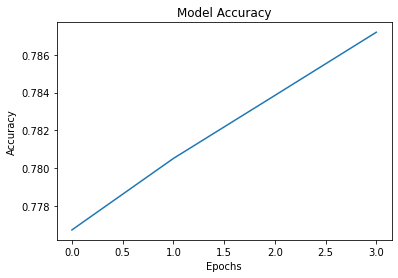

In [101]:
# plot summarize history for loss & val_loss

plt.plot(model_lstm_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

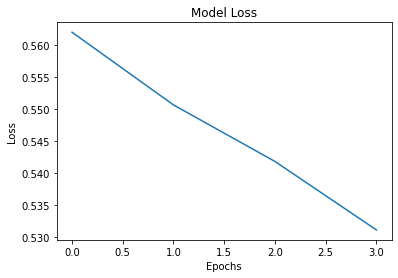

In [102]:
# plot summarize history for loss & val_loss

plt.plot(model_lstm_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [159]:
## Prediction & Evaluation

y_pred = model_lstm.predict(X_test)
y_pred_lstm = np.argmax(y_pred, axis=1) 


1624/1624 [==============================] - 22s 14ms/step


In [160]:
y_pred

array([[0.9406948 , 0.0406014 , 0.01870377],
       [0.9769247 , 0.01338332, 0.00969192],
       [0.01154925, 0.95762   , 0.03083063],
       ...,
       [0.3275483 , 0.5348789 , 0.13757277],
       [0.9764682 , 0.01862087, 0.00491099],
       [0.48860812, 0.02206736, 0.48932448]], dtype=float32)

In [161]:
y_pred_lstm

array([0, 0, 1, ..., 1, 0, 2])

In [162]:
y_test

array([0., 0., 1., ..., 1., 0., 1.])

In [169]:
y_test_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [165]:
y_pred_lstm

array([0, 0, 1, ..., 1, 0, 2])

In [166]:
y_pred_lstm[y_pred_lstm == 2] = -1

In [167]:
y_pred_lstm

array([ 0,  0,  1, ...,  1,  0, -1])

In [170]:
y_test

array([0., 0., 1., ..., 1., 0., 1.])

In [172]:
## Evaluating 

from sklearn.metrics import  accuracy_score, confusion_matrix , classification_report

print(classification_report(y_test,y_pred_lstm))

              precision    recall  f1-score   support

        -1.0       0.68      0.62      0.65     11436
         0.0       0.77      0.78      0.77     17374
         1.0       0.78      0.81      0.79     23141

    accuracy                           0.76     51951
   macro avg       0.74      0.74      0.74     51951
weighted avg       0.75      0.76      0.75     51951



In [173]:
print(accuracy_score(y_test,y_pred_lstm))

0.7558083578756906


In [174]:
confusion_matrix(y_test,y_pred_lstm)

array([[ 7110,  1556,  2770],
       [ 1378, 13525,  2471],
       [ 1990,  2521, 18630]])

## Bidirectonal LSTM

In [176]:
from tensorflow.keras.layers import Bidirectional

In [178]:
model_BL = Sequential()
model_BL.add(Embedding(voc_size,100,input_length = sent_length))
model_BL.add(Bidirectional(LSTM(128)))
model_BL.add(Dense(128, activation = "relu"))
model_BL.add(Dropout(0.5))
model_BL.add(Dense(3, activation = "softmax"))
model_BL.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 100)           500000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 767779 (2.93 MB)
Trainable params: 767779 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [179]:
model_BL.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [180]:
model_BL_history = model_BL.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot),epochs=20,batch_size=1000,callbacks=[early_stopping])

Epoch 1/20
106/106 [==============================] - 66495s 633s/step - loss: 0.8190 - accuracy: 0.6325 - val_loss: 0.6298 - val_accuracy: 0.7405
Epoch 2/20
106/106 [==============================] - 102s 960ms/step - loss: 0.5975 - accuracy: 0.7606 - val_loss: 0.6111 - val_accuracy: 0.7500
Epoch 3/20
106/106 [==============================] - 99s 932ms/step - loss: 0.5710 - accuracy: 0.7720 - val_loss: 0.6074 - val_accuracy: 0.7502
Epoch 4/20
106/106 [==============================] - 120s 1s/step - loss: 0.5591 - accuracy: 0.7763 - val_loss: 0.6023 - val_accuracy: 0.7543
Epoch 5/20
106/106 [==============================] - 122s 1s/step - loss: 0.5445 - accuracy: 0.7806 - val_loss: 0.6101 - val_accuracy: 0.7519
Epoch 6/20
106/106 [==============================] - 130s 1s/step - loss: 0.5266 - accuracy: 0.7875 - val_loss: 0.6081 - val_accuracy: 0.7518


In [182]:
model_BL.evaluate(X_train, y_train_one_hot)

   6/3297 [..............................] - ETA: 1:15 - loss: 0.5140 - accuracy: 0.7552

3297/3297 [==============================] - 85s 26ms/step - loss: 0.5233 - accuracy: 0.7911


[0.523267388343811, 0.7910954356193542]

In [184]:
model_BL.evaluate(X_test, y_test_one_hot)

1624/1624 [==============================] - 43s 26ms/step - loss: 0.6023 - accuracy: 0.7543


[0.6023443937301636, 0.7543261647224426]

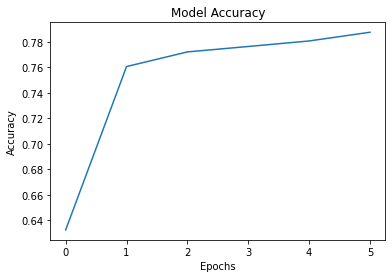

In [185]:
# plot summarize history for Accuracy 

plt.plot(model_BL_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

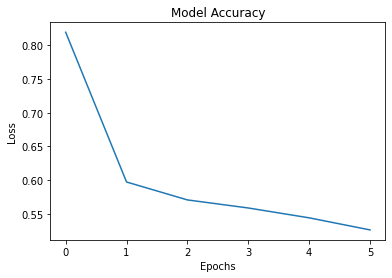

In [186]:
# plot summarize history for loss & val_loss

plt.plot(model_BL_history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [188]:
## Prediction & Evaluation

y_pred = model_BL.predict(X_test)
y_pred_BL = np.argmax(y_pred, axis=1) 


  11/1624 [..............................] - ETA: 31s

1624/1624 [==============================] - 37s 23ms/step


In [189]:
y_pred_BL

array([0, 0, 1, ..., 1, 0, 2])

In [190]:
y_test

array([0., 0., 1., ..., 1., 0., 1.])

In [193]:
y_pred_BL[y_pred_BL== 2] = -1
y_pred_BL

array([ 0,  0,  1, ...,  1,  0, -1])

In [194]:
## Evaluating 

from sklearn.metrics import  accuracy_score, confusion_matrix , classification_report

print(classification_report(y_test,y_pred_BL))

              precision    recall  f1-score   support

        -1.0       0.67      0.63      0.65     11436
         0.0       0.78      0.76      0.77     17374
         1.0       0.77      0.81      0.79     23141

    accuracy                           0.75     51951
   macro avg       0.74      0.73      0.74     51951
weighted avg       0.75      0.75      0.75     51951



In [195]:
print(accuracy_score(y_test,y_pred_BL))

0.7543261919886046


In [196]:
print(confusion_matrix(y_test,y_pred_BL))

[[ 7169  1418  2849]
 [ 1424 13265  2685]
 [ 2089  2298 18754]]
